In [43]:
import warnings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow
print(tensorflow.__version__)

2.16.1


In [44]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.float_format='{:.7f}'.format
pd.options.display.max_rows=None
#Reading the .h5 file and assign to a variable
import h5py

In [45]:
h5f=h5py.File('/kaggle/input/streetviewhousenumber/Autonomous_Vehicles_SVHN_single_grey1.h5')

In [46]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [47]:
#Split the data into X_train,X_test,y_train,y_test
#load the training, test and validation set

In [48]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [49]:
#print shape of all the 4 data split into x,y,train,test to verify if x and 


In [50]:
X_train.shape

(42000, 32, 32)

In [51]:
X_train

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

In [52]:
X_test.shape

(18000, 32, 32)

In [53]:
y_train.shape

(42000,)

In [54]:
y_test.shape

(18000,)

In [55]:
import matplotlib.pyplot as plt

def img_lab(n):
    plt.figure(figsize=(n, 1))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(X_train[i], cmap='gray')
        plt.axis('off')
    plt.show()  # Move plt.show() outside the loop to display all images at once
    print('Label for each of the above images: %s' % (y_train[0:n]))


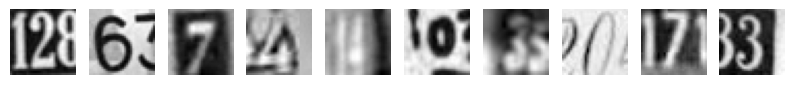

Label for each of the above images: [2 6 7 4 4 0 3 0 7 3]


In [56]:
img_lab(10)

In [57]:
X_train.shape

(42000, 32, 32)

In [58]:
X_train=X_train.reshape(X_train.shape[0],1024,1)
X_test=X_test.reshape(X_test.shape[0],1024,1)

In [59]:
X_train=X_train/255.0
X_test=X_test/255.0

In [60]:
print('Resized Training set',X_train.shape,y_train.shape)
print('Resized Test set',X_test.shape,y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


In [61]:
from tensorflow.keras.utils import to_categorical
#one hot encode outputs
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
#no. of classes
num_classes=y_test.shape[1]
print('THe number of classes in this dataset are:',num_classes)

THe number of classes in this dataset are: 10


In [62]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def cnn_model():
    model = Sequential()
    # First convolutional layer
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))  # Add closing parenthesis and specify input channels
    model.add(MaxPooling1D(pool_size=2))
    
    # Second convolutional layer
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Third convolutional layer
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten the output for the dense layers
    model.add(Flatten())
    
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output layer (adjust units based on the number of classes)
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification
    
    return model


In [64]:
#build the model
model=cnn_model()

In [71]:
from tensorflow.keras.optimizers import Adam

# Compile model
sgd = Adam(learning_rate=1e-3)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [72]:
training_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=300,epochs=20)

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.7287 - loss: 0.7564 - val_accuracy: 0.7428 - val_loss: 0.8381
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7346 - loss: 0.7326 - val_accuracy: 0.7421 - val_loss: 0.8358
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7420 - loss: 0.7097 - val_accuracy: 0.7425 - val_loss: 0.8543
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7411 - loss: 0.7073 - val_accuracy: 0.7440 - val_loss: 0.8538
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7447 - loss: 0.7003 - val_accuracy: 0.7458 - val_loss: 0.8580
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.7467 - loss: 0.7021 - val_accuracy: 0.7434 - val_loss: 0.8729
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7515 - loss: 0.6786 - val_accuracy: 0.7464 - val_loss: 0.8789
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.7547 - loss: 0.6745 - val_acc

In [73]:
# Final evalution of the model
scores=model.evaluate(X_test,y_test,verbose=0)
print('Loss:',scores[0])
print('Accuracy:',scores[1])

Loss: 0.9670770168304443
Accuracy: 0.7408333420753479


Text(0.5, 1.0, 'Training and validation loss')

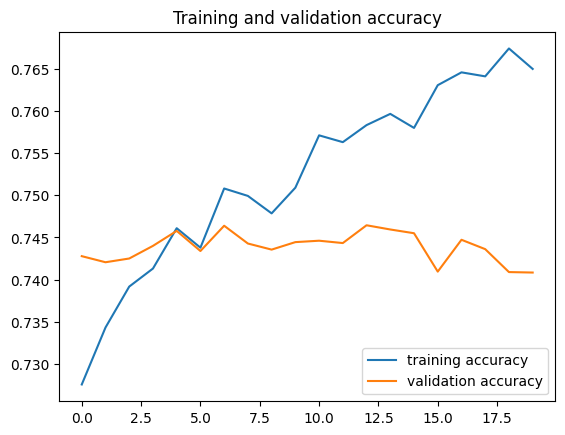

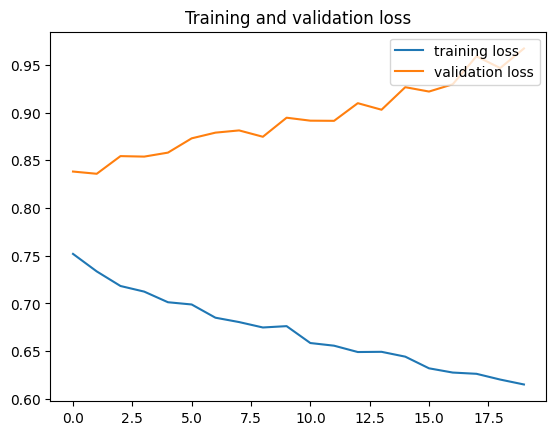

In [74]:
accuracy=training_history.history['accuracy']
val_accuracy=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()
plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
